# **Sales and Customer Data** 🛒

> This dataset contains 10,000 sales transactions across different countries, product categories, and sales channels. It includes details about sales revenue, cost, and profit, helping us understand business performance and customer trends.

## 🎯 **Project Goal**


1. **Clean and organize** the data to make it useful for analysis.
2. **Explore sales trends**, most profitable products, and top-selling regions.
3. **Create visualizations** to represent key business insights.
4. **Build an interactive dashboard** to present findings.

## **🔍 Understanding the Dataset**

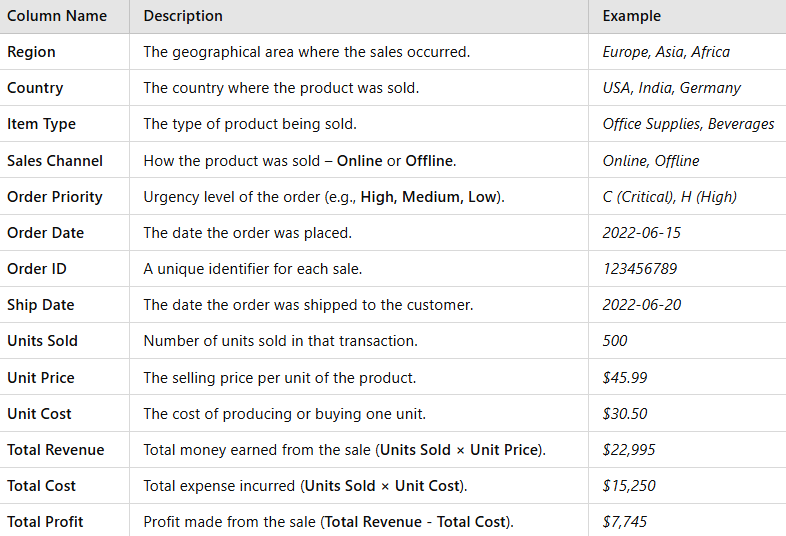

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium
import dash                         # Dash framework
from dash import dcc, html
import warnings
warnings.filterwarnings('ignore')

In [2]:
def safe_comma_format(x):
    try:
        # If the number is integer (such as the year), return it as it is without decimal formatting.
        if float(x).is_integer() and int(float(x)) < 3000:  # Assume the year is less than 3000
            return str(int(x))
        return format(float(x), ",.2f")
    except (ValueError, TypeError):
        return x  # If it's not a number, return it as it is

# Importing and inspecting data

* read csv dataset

In [3]:
sales = pd.read_csv(r"E:/Omar/Courses/ML (AMIT)/Python Course/Final Data Analysis Project/10000 Sales Records.csv")

In [4]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [5]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [7]:
sales.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
sales.duplicated().sum()

np.int64(0)

In [9]:
sales['Order ID'].duplicated().sum()

np.int64(0)

In [10]:
sales[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Units Sold,10000.0,5002.86,2873.25,2.00,2530.75,4962.00,7472.00,10000.00
Unit Price,10000.0,268.14,217.94,9.33,109.28,205.70,437.20,668.27
Unit Cost,10000.0,188.81,176.45,6.92,56.67,117.11,364.69,524.96
Total Revenue,10000.0,1333355.13,1465026.17,167.94,288551.08,800051.21,1819143.39,6680026.92
Total Cost,10000.0,938265.78,1145914.07,124.56,164785.53,481605.84,1183821.52,5241725.60
Total Profit,10000.0,395089.35,377554.96,43.38,98329.14,289099.02,566422.71,1738178.39


---

### Convert to Datetime

In [11]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])
sales.reset_index()

,index,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2011-02-12,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,2016-01-23,1075,47.45,31.79,51008.75,34174.25,16834.50
2,2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2011-02-01,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,2012-10-06,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,2015-12-05,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,2014-07-31,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,2012-11-01,562,437.20,263.33,245706.40,147991.46,97714.94
9997,9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,2013-03-20,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,2017-02-22,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [12]:
#data pre processing:
sales['order_day_of_the_month']=sales['Order Date'].dt.day
sales['order_week_day']=sales['Order Date'].dt.dayofweek
sales['order_month']=sales['Order Date'].dt.month
sales['order_year']=sales['Order Date'].dt.year
sales['order_year']=sales['Order Date'].dt.year
sales['shipment_delay']=sales['Ship Date']-sales['Order Date']

maping ={1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
sales['order_month']=sales['order_month'].map(maping)

sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order_day_of_the_month,order_week_day,order_month,order_year,shipment_delay
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,2011-01-27,292494523,2011-02-12,4484,651.21,524.96,2920025.64,2353920.64,566105.00,27,3,jan,2011,16 days
1,Europe,Latvia,Beverages,Online,C,2015-12-28,361825549,2016-01-23,1075,47.45,31.79,51008.75,34174.25,16834.50,28,0,dec,2015,26 days
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,2011-01-13,141515767,2011-02-01,6515,154.06,90.93,1003700.90,592408.95,411291.95,13,3,jan,2011,19 days
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,2012-09-11,500364005,2012-10-06,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,11,1,sep,2012,25 days
4,Europe,Czech Republic,Beverages,Online,C,2015-10-27,127481591,2015-12-05,3491,47.45,31.79,165647.95,110978.89,54669.06,27,1,oct,2015,39 days


In [13]:
sales.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,order_day_of_the_month,order_week_day,order_month,order_year,shipment_delay
9995,Asia,Laos,Beverages,Online,H,2014-07-15,199342048,2014-07-31,8597,47.45,31.79,407927.65,273298.63,134629.02,15,1,july,2014,16 days
9996,Europe,Liechtenstein,Cosmetics,Online,C,2012-10-27,763044106,2012-11-01,562,437.20,263.33,245706.40,147991.46,97714.94,27,5,oct,2012,5 days
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2013-02-14,848579967,2013-03-20,2524,154.06,90.93,388847.44,229507.32,159340.12,14,3,feb,2013,34 days
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2017-02-19,298185956,2017-02-22,8706,421.89,364.69,3672974.34,3174991.14,497983.20,19,6,feb,2017,3 days
9999,Asia,Mongolia,Snacks,Offline,M,2016-04-12,824410903,2016-04-16,361,152.58,97.44,55081.38,35175.84,19905.54,12,1,april,2016,4 days


In [14]:
duration = sales['Order Date'].max() - sales['Order Date'].min()
duration

Timedelta('2765 days 00:00:00')

### Size handling

In [15]:
sales[sales.select_dtypes('object').columns] = sales.select_dtypes('object').astype('category')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Region                  10000 non-null  category       
 1   Country                 10000 non-null  category       
 2   Item Type               10000 non-null  category       
 3   Sales Channel           10000 non-null  category       
 4   Order Priority          10000 non-null  category       
 5   Order Date              10000 non-null  datetime64[ns] 
 6   Order ID                10000 non-null  int64          
 7   Ship Date               10000 non-null  datetime64[ns] 
 8   Units Sold              10000 non-null  int64          
 9   Unit Price              10000 non-null  float64        
 10  Unit Cost               10000 non-null  float64        
 11  Total Revenue           10000 non-null  float64        
 12  Total Cost              10000 non

---

---

In [16]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'order_day_of_the_month', 'order_week_day', 'order_month', 'order_year',
       'shipment_delay'],
      dtype='object')

In [17]:
sales['Region'].value_counts()
sales['Country'].value_counts()

Country
Lithuania         72
United Kingdom    72
Moldova           71
Seychelles        70
Croatia           70
                  ..
Slovakia          42
Greenland         41
Tajikistan        40
Saint Lucia       39
Mali              35
Name: count, Length: 185, dtype: int64

In [18]:
sales[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Units Sold,10000.0,5002.86,2873.25,2.00,2530.75,4962.00,7472.00,10000.00
Unit Price,10000.0,268.14,217.94,9.33,109.28,205.70,437.20,668.27
Unit Cost,10000.0,188.81,176.45,6.92,56.67,117.11,364.69,524.96
Total Revenue,10000.0,1333355.13,1465026.17,167.94,288551.08,800051.21,1819143.39,6680026.92
Total Cost,10000.0,938265.78,1145914.07,124.56,164785.53,481605.84,1183821.52,5241725.60
Total Profit,10000.0,395089.35,377554.96,43.38,98329.14,289099.02,566422.71,1738178.39


---

# Exploratory Data Analysis - EDA 📊  &  Data Visualization 📈

---

## 1. Top Selling Products 🎯 and Top Profitable Products 💰

### 🎯 Analysis Objectives:

* What are the best-selling products?
* What are the highest-profit products?
* Are there products that excel in certain country?
* Are there products with low sales but high profits?
* Are the highest-profitable products sold through a specific channel?

In [19]:
top_selling = sales.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).reset_index()
top_selling

,Item Type,Units Sold
0,Personal Care,4402827
1,Clothes,4352350
2,Household,4336803
3,Vegetables,4238098
4,Cereal,4203394
5,Baby Food,4197006
6,Snacks,4122781
7,Office Supplies,4120263
8,Cosmetics,4103290
9,Fruits,4055921


In [20]:
top_product_profit = sales.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False).reset_index()
top_product_profit

,Item Type,Total Profit
0,Household,7.187384e+08
1,Cosmetics,7.134390e+08
2,Office Supplies,5.201832e+08
3,Baby Food,4.023250e+08
4,Cereal,3.723787e+08
5,Clothes,3.196366e+08
6,Vegetables,2.675511e+08
7,Meat,2.279643e+08
8,Snacks,2.273301e+08
9,Personal Care,1.103348e+08


## Data Visualization📊

In [21]:
# Create sub-plot
fig = make_subplots(rows=1, cols=2, subplot_titles=('Top Selling Products 🎯', 'Top Profitable Products 💰'))

# Add the first line chart (units sold)
fig.add_trace(
    go.Line(x=top_selling["Item Type"], y=top_selling["Units Sold"], name="Units Sold", marker_color='green'),
    row=1, col=1
)

# Add the second line chart (Total Profit)
fig.add_trace(
    go.Line(x=top_product_profit["Item Type"], y=top_product_profit["Total Profit"], name="Total Profit", marker_color='orange'), # تغيير اللون للتمييز
    row=1, col=2
)


fig.update_layout(
    height=500,      # Adjust the height.
    width=1200,      # Adjust the witdth
    showlegend=True  # To show Units Sold and Total Profit labels
)

# Rotate the x-axis labels for both subcharts.
fig.update_xaxes(tickangle=-90, row=1, col=1)
fig.update_xaxes(tickangle=-90, row=1, col=2)

fig.show()

c:\Users\10\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Insights 📌
* The top-selling products were Personal Care and Clothes.

* However, the products with the highest profitability were Household and Cosmetics.

* Selling large quantities doesn't always translate to high profits; the profit margin makes a significant difference.


### Recommendation 💡
Focus on high-profit-margin products and re-evaluate the pricing and marketing strategies for products with good sales but low profitability.

---

## 2. Top Profitable Regions 🌍

### 🎯 Analysis Objectives:

* What are the most profitable areas?
* What is the evolution of each region's performance over time?

In [22]:
top_region_profit = sales.groupby('Region')['Total Profit'].sum().sort_values(ascending=False).reset_index()
top_region_profit

,Region,Total Profit
0,Europe,1.027000e+09
1,Sub-Saharan Africa,9.996421e+08
2,Asia,5.874033e+08
3,Middle East and North Africa,5.099239e+08
4,Central America and the Caribbean,4.033578e+08
5,Australia and Oceania,3.240712e+08
6,North America,9.949552e+07


## Data Visualization📊

In [23]:
fig = px.bar(
    top_region_profit,
    x='Region',
    y='Total Profit',
    title='Total Profit by Region',
    color='Total Profit',
    color_continuous_scale='tempo',
    width = 1000,
    height = 600
)
fig.show()

In [24]:
years_region_profit = sales.groupby(['order_year', 'Region'])['Total Profit'].sum().reset_index()
years_region_profit
years_region_profit_sorted = years_region_profit.sort_values(by=['Total Profit'], ascending=[False])
years_region_profit_sorted.applymap(safe_comma_format)


,order_year,Region,Total Profit
34,2014,Sub-Saharan Africa,"148,880,000.61"
24,2013,Europe,"146,762,267.11"
38,2015,Europe,"141,507,971.76"
17,2012,Europe,"140,086,335.60"
10,2011,Europe,"139,016,810.01"
45,2016,Europe,"135,834,134.92"
41,2015,Sub-Saharan Africa,"135,099,855.47"
13,2011,Sub-Saharan Africa,"134,348,435.91"
6,2010,Sub-Saharan Africa,"134,138,959.12"
48,2016,Sub-Saharan Africa,"126,997,851.03"


In [25]:

fig = px.area(
    years_region_profit_sorted,
    x='order_year',
    y='Total Profit',
    color='Region',
    title='Cumulative and Contributing Profit in Each Region',
    line_group='Region',
    labels={'Total Profit': 'Profit ($)', 'Year': 'Date'},
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Profit',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()


### Insights 📌
**Overall Profitability Trend**
* Profitability showed continuous **growth** until 2015, followed by a **sharp decline** in 2016 and 2017.

**Regional Contributions**
* **Top-Contributing** Regions **Europe** and **Sub-Saharan Africa** are the primary pillars of profitability.
* **Lowest-Contributing** Regions **North America** and **Australia and Oceania** have the lowest contribution to profits.

**Recommendation**
* Investigate the causes of the recent **decline in overall profits**. Develop action plans for the underperforming regions while leveraging the strengths in Europe and Sub-Saharan Africa.

---

## 3. Online vs Offline 🛒

In [26]:
years_channel_profit = sales.groupby(['order_year', 'Sales Channel'])[['Total Profit', 'Units Sold']].sum().reset_index()
years_channel_profit.applymap(safe_comma_format)

,order_year,Sales Channel,Total Profit,Units Sold
0,2010,Offline,"232,770,342.76","2,879,012.00"
1,2010,Online,"249,729,397.48","3,166,065.00"
2,2011,Offline,"271,246,504.84","3,380,155.00"
3,2011,Online,"257,630,896.77","3,401,496.00"
4,2012,Offline,"261,813,407.89","3,357,659.00"
5,2012,Online,"243,948,685.59","3,252,090.00"
6,2013,Offline,"283,937,236.81","3,420,216.00"
7,2013,Online,"257,982,751.10","3,297,954.00"
8,2014,Offline,"280,464,372.27","3,504,716.00"
9,2014,Online,"261,883,913.38","3,266,398.00"


### 🎯 Analysis Objectives:
* Which sales channel makes more profits?
* Is offline stronger in certain country?
* Profitability Increasing Over Time in a Specific Channel?

## Data Visualization📊

In [27]:
pie_channel = sales.groupby('Sales Channel')[['Total Profit', 'Units Sold']].sum().reset_index()
pie_channel.applymap(safe_comma_format)

,Sales Channel,Total Profit,Units Sold
0,Offline,"1,980,902,168.79","24,796,305.00"
1,Online,"1,969,991,303.14","25,232,254.00"


In [28]:



fig = px.pie(

    pie_channel,
    names = 'Sales Channel',
    values = 'Total Profit',
    title = 'Total Profit by Year and Sales Channel',

    hover_data=['Total Profit'],

)
fig.update_layout(
    width=600,   # Adjust the height
    height=600   # Adjust the witdth
)


fig.show()


In [29]:
fig = px.scatter(

    years_channel_profit,
    x = 'order_year',
    y = 'Total Profit',
    color = 'Sales Channel',
    size = 'Units Sold',
    hover_name = 'Sales Channel',
    title = 'Total Profit by Year and Sales Channel',
    labels = {'Total Profit' : 'Profit ($)', 'order_year' : 'Year'},
)


fig.update_layout(

    xaxis_title = 'Year',
    yaxis_title = 'Total Profit',
    width = 800,
    height = 600,
    template = 'plotly_white'
)



<Axes: title={'center': 'products that sold more in online'}, xlabel='Item Type'>

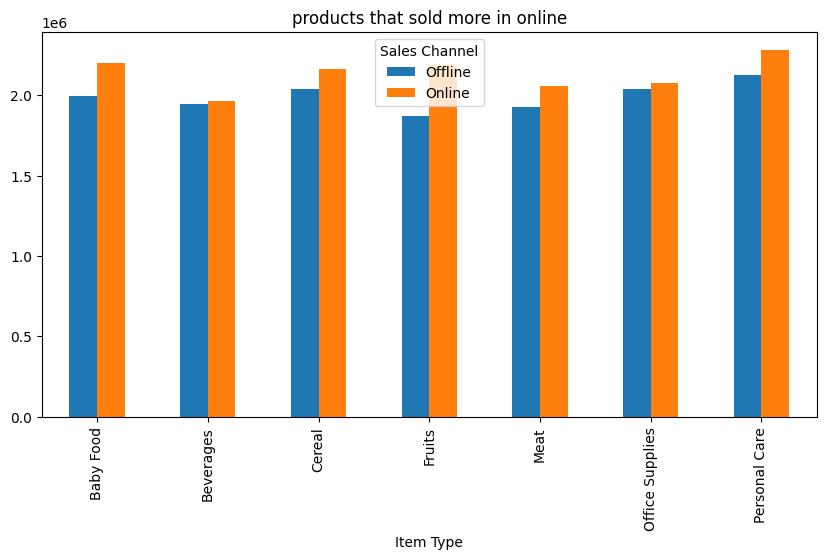

In [30]:
#product vs sales chaneels:
sales_chnl=pd.pivot_table(data=sales,index='Item Type',columns='Sales Channel',values='Units Sold',aggfunc='sum')

sales_on=sales_chnl[sales_chnl['Online']>sales_chnl['Offline']]

sales_on.plot(kind='bar',figsize=(10,5),title='products that sold more in online')



<Axes: title={'center': 'products that sold more in offline'}, xlabel='Item Type'>

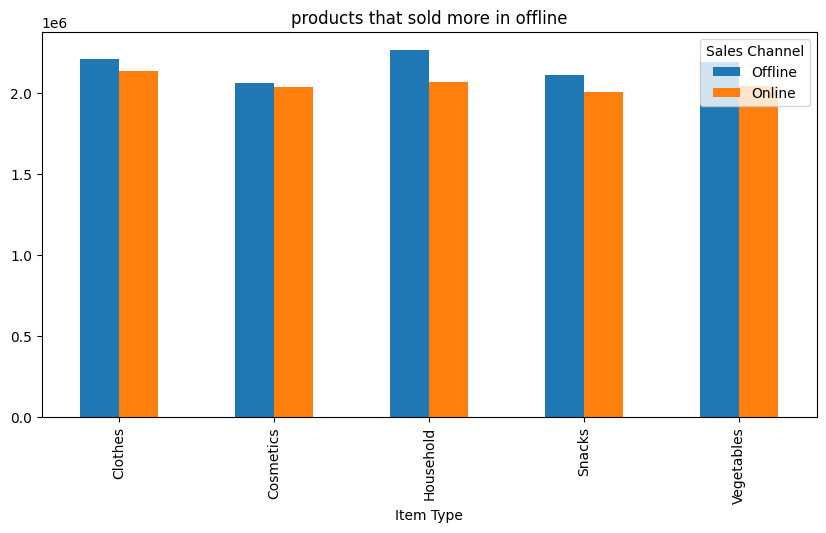

In [31]:
sales_chnl=pd.pivot_table(data=sales,index='Item Type',columns='Sales Channel',values='Units Sold',aggfunc='sum')

sales_on=sales_chnl[sales_chnl['Online']<sales_chnl['Offline']]

sales_on.plot(kind='bar',figsize=(10,5),title='products that sold more in offline')

### Insights 📌
**Channel Contribution Balance**
* Both sales channels, **Offline** and **Online**, contribute very similar proportions (approximately 50% each) to overall profits.
* The channels are relatively balanced, and marketing efforts can be distributed evenly.

**Annual Profitability Trends**
* Profits have experienced fluctuations, with Online reaching its peak in 2015.
* A sharp and notable decline in profits for both channels occurred in 2017, which warrants investigation.
* ***Online*** demand is more consistent and widespread over time. Although total profit is lower, the number of orders and profit remain stable yearly, indicating that it is an important channel for maintaining a steady flow of sales.
* ***Offline*** profits experience significant seasonal increases. This may be linked to sales seasons or specific campaigns, suggesting the potential for leveraging events and offers to improve online results as well.

**Product Preferences by Channel**
* **Offline** Channel excels in: Clothes, Cosmetics, Household, Snacks, and Vegetables.
* **Online** Channel excels in: Baby Food, Beverages, Cereal, Fruits, Meat, Office Supplies, and Personal Care.

---

## 4. Order Priority 🚦


### 🎯 Analysis Objectives:
* Which priority earns the most?

* Do critical orders actually generate the highest profits?

* What is the profit trend by priority over time?

## Data Visualization📊

In [32]:
priority_profit = sales.groupby("Order Priority")["Total Profit"].sum().sort_values(ascending=False).reset_index()



fig = px.pie(

    priority_profit,
    names = 'Order Priority',
    values = 'Total Profit',
    title = 'Total Profit by Order Priority',

    hover_data=['Total Profit'],

)
fig.update_layout(
    width=600,   # Adjust the width
    height=600   # Adjust the height
)

fig.show()

In [33]:
yearly_priority_profit = sales.groupby(["order_year", "Order Priority"])["Total Profit"].sum().reset_index()

fig = px.line(
    yearly_priority_profit,
    x="order_year",
    y="Total Profit",
    color="Order Priority",
    title="Yearly Profit Trend by Order Priority",
    markers=True,
    # labels='Units Sold'
)
fig.update_layout(xaxis_title="Years", yaxis_title="Total Profit")
fig.show()

### Insights 📌
**Balanced Profit Distribution**
* All order priority levels (C, H, L, M) contribute very similar proportions to the total profit. This indicates no significant reliance on any single priority level.
* High/Critical orders don't always equal higher profits.

**Parallel Trends Over Time**
* Profits remained relatively stable and consistent across all priority levels from 2010 to 2016.

---

## 5. Correlation Heatmap

### 🎯 Analysis Objectives:
* Does increasing units sold lead to increased profit?
* Is there a relationship between unit price and cost?

In [34]:
col = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',]
sales_corr = sales[col].corr().round(3)
sales_corr

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000,-0.013,-0.012,0.519,0.466,0.597
Unit Price,-0.013,1.000,0.986,0.733,0.749,0.571
Unit Cost,-0.012,0.986,1.000,0.723,0.760,0.500
Total Revenue,0.519,0.733,0.723,1.000,0.988,0.882
Total Cost,0.466,0.749,0.760,0.988,1.000,0.798
Total Profit,0.597,0.571,0.500,0.882,0.798,1.000


## Data Visualization📊

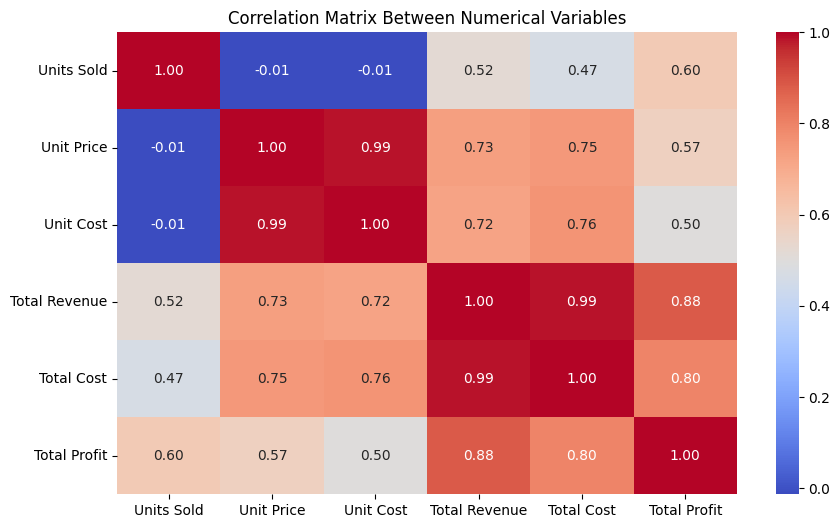

In [35]:
plt.figure(figsize=(10, 6))

sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Between Numerical Variables")
plt.show()

### Insights 🔍
* The data is logical and valid, and there are no strange relationships that need further study.

|The relationship between the two variables |       explanation                                            |
| -------------------------------- | ------------------------------------------------------------- |
| `Units Sold` & `Total Revenue`   | Strong positive correlation (the more sales, the more revenue)             |
| `Units Sold` & `Total Profit`    | Positive correlation, but not always strong (a lot of selling does not always mean profit)|
| `Unit Cost` & `Unit Price`       | Strong positive correlation (selling price increases with cost)          |
| `Total Revenue` & `Total Profit` | Very strong relationship, but profit is affected by cost                   |

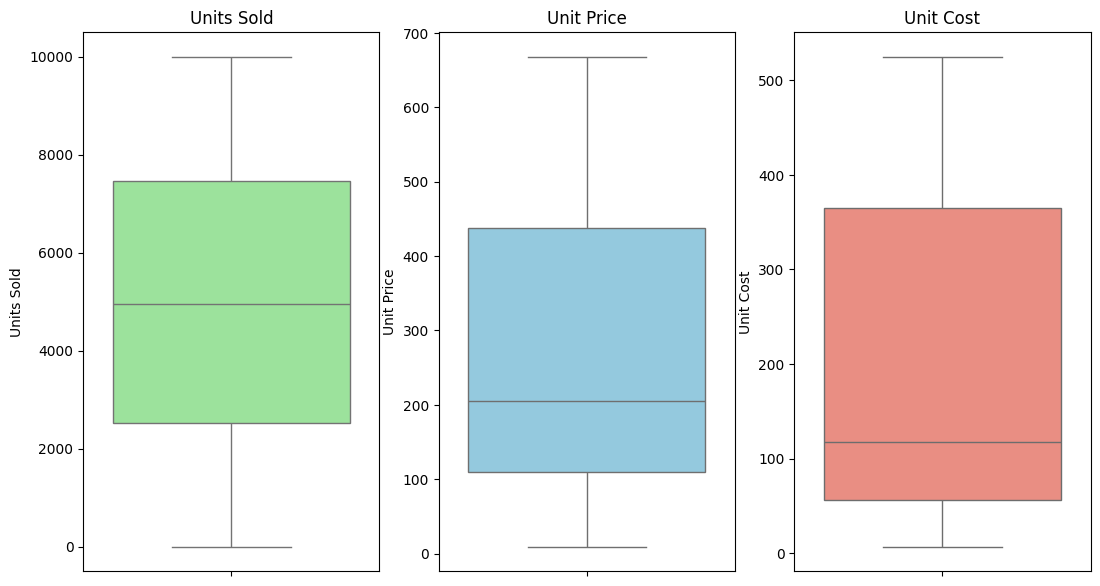

In [36]:
plt.figure(figsize=(13, 7))
plt.subplot(1, 3, 1)
sns.boxplot(y = sales['Units Sold'], color='lightgreen')
plt.title('Units Sold')

plt.subplot(1, 3, 2)
sns.boxplot(y = sales['Unit Price'], color='skyblue')
plt.title('Unit Price')

plt.subplot(1, 3, 3)
sns.boxplot(y = sales['Unit Cost'], color='salmon')
plt.title('Unit Cost')

plt.show()

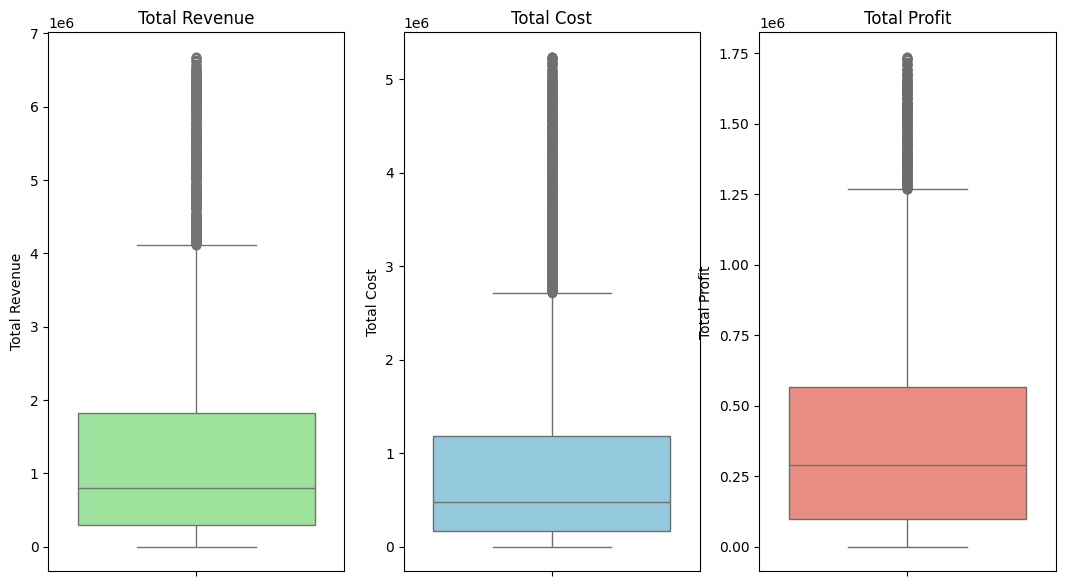

In [37]:
plt.figure(figsize=(13, 7))
plt.subplot(1, 3, 1)
sns.boxplot(y = sales['Total Revenue'], color='lightgreen')
plt.title('Total Revenue')

plt.subplot(1, 3, 2)
sns.boxplot(y = sales['Total Cost'], color='skyblue')
plt.title('Total Cost')

plt.subplot(1, 3, 3)
sns.boxplot(y = sales['Total Profit'], color='salmon')
plt.title('Total Profit')

plt.show()

## 6. Dominant Countries 🗺️

### 🎯 Analysis Objectives:
* Which countries generate the most sales and profits?

* Are there countries that sell a lot but make little profit? Or vice versa?

* Are there countries that rely on a specific type of product?

## Data Visualization📊

In [38]:
country_profit = sales.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(

    country_profit.head(10),
    x = 'Country',
    y = 'Total Profit',
    title = 'Top 10 Countries by Total Profit',
    color = 'Total Profit',
    color_continuous_scale = 'viridis',
    width = 1000,
    height = 600
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [39]:
country_sales = sales.groupby('Country')['Units Sold'].sum().sort_values(ascending=False).reset_index()

fig = px.bar(

    country_sales.head(10),
    x = 'Country',
    y = 'Units Sold',
    title = 'Top 10 Countries by Units Sold',
    color = 'Units Sold',
    color_continuous_scale = 'viridis',
    width = 1000,
    height = 600
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [40]:
fig = px.scatter(
    sales,
    x='Units Sold',
    y='Total Profit',
    color='Item Type',  # color the dots according to the type of product.
    title='Units Sold vs Total Profit by Item Type',
    hover_data=['Country', 'Sales Channel', 'Order Priority'],
    opacity=0.7
)

fig.update_layout(
    xaxis_title='Units Sold',
    yaxis_title='Total Profit',
    template='plotly_white'
)

fig.show()

### Insights 🔍
* Clear Direct Relationship: Generally, as the number of units sold increases, so does the profit. However, this isn't always at the same rate.

* High Volume, Low Profit: Some products sell in massive quantities but yield low profit. This could indicate either low-priced products or high-cost products.

* Low Volume, High Profit: Certain products generate high profit from a small number of units, suggesting they are high-profit-margin products.

In [41]:
yearly_country_profit = sales.groupby(['order_year', 'Country'])['Total Profit'].sum().reset_index()

fig = px.area(
    yearly_country_profit[yearly_country_profit['Country'].isin(
        country_profit.head(5)['Country'])],  # Show top 5 country
    x='order_year',
    y='Total Profit',
    color='Country',
    title='Yearly Profit Trend of Top 5 Countries'
)
fig.show()

### Insights 🔍
* Some countries might have high sales but low profit, which indicates either low-priced or high-cost products.
* Other countries might achieve high profits despite moderate sales, which indicates the sale of high-profitability products.
* Yearly stability in some countries indicates stable demand.

---

# 7. Dashboard 📊

In [42]:
app = dash.Dash(__name__)         # Opens a new Dash app.
app.title = "Sales Dashboard"     # Changes the page title that appears in the browser tab.

# Layout of the app (what appears on the webpage)
app.layout = html.Div([           # html.Div([...]) It is a container in which you can put many items.
    html.H1("📊 Sales Dashboard", style={'textAlign': 'center'}),    # Page title

    html.Div([
        html.Label("Filter by Item Type"),
        dcc.Dropdown(        # To make a drop-down list from which you can select items.
            options=[{'label': item, 'value': item} for item in sales['Item Type'].unique()],
            value=sales['Item Type'].unique().tolist(),    # Default values selected (all values).
            multi=True,      # Allows you to select more than one value.
            id='item-type-dropdown'   # Identifiers used for later interaction.
        ),

        html.Label("Filter by Region"),
        dcc.Dropdown(
            options=[{'label': region, 'value': region} for region in sales['Region'].unique()],
            value=sales['Region'].unique().tolist(),
            multi=True,
            id='region-dropdown'
        ),



    ], style={'width': '40%', 'margin': 'auto'}),

    html.Br(),    # Put a new line on the page and Separate the elements in the application interface and provide a small vertical space.

    html.Div([   # A place where interactive graphics are displayed using Plotly.
        dcc.Graph(id='country-profit-chart'),
        dcc.Graph(id='yearly-trend-chart'),
        dcc.Graph(id='scatter-chart'),
        dcc.Graph(id='channel-pie-chart'),
    ])  # Each Graph has a unique ID to associate with the callback.
])

# Interaction between filters and charts
#It connects inputs such as dropdowns and outputs such as graphics.
@app.callback(       # This is a function that runs every time the user changes filters.
    dash.Output('country-profit-chart', 'figure'),
    dash.Output('yearly-trend-chart', 'figure'),
    dash.Output('scatter-chart', 'figure'),
    dash.Output('channel-pie-chart', 'figure'),
    dash.Input('item-type-dropdown', 'value'),
    dash.Input('region-dropdown', 'value'),

)
def update_charts(selected_items, selected_regions):
    # Give me the rows that meet this condition.
    filtered = sales[   sales["Item Type"].isin(selected_items) & sales["Region"].isin(selected_regions)]
    # Profit by Country
    country_profit = filtered.groupby("Country")["Total Profit"].sum().sort_values(ascending=False).reset_index()
    fig_country = px.bar(country_profit.head(15), x="Country", y="Total Profit", title="Top Countries by Profit")

    # yearly Profit
    yearly_profit = filtered.groupby("order_year")["Total Profit"].sum().reset_index()
    fig_year = px.line(yearly_profit, x="order_year", y="Total Profit", markers=True, title="yearly Profit Trend")

    # Scatter
    fig_scatter = px.scatter(filtered, x="Units Sold", y="Total Profit", color="Item Type",
                            title="Units Sold vs Total Profit")

    # Sales Channel Pie
    channel_profit = filtered.groupby("Sales Channel")["Total Profit"].sum().reset_index()
    fig_channel = px.pie(channel_profit, names="Sales Channel", values="Total Profit", title="Profit by Sales Channel")

    return fig_country, fig_year, fig_scatter, fig_channel





In [43]:
# Run the app on local server
app.run()